In [1]:
from transformers import pipeline
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
context='''The first batch of five Rafale jets flew out of France today and will arrive in India on Wednesday, July 29, when the fighter jets will officially be inducted and join the Indian Air Force fleet in Haryana's Ambala. The fighter jets, built by French aviation firm Dassault, took off from the Merignac airbase in southern France's Bordeaux today.
The five aircraft will be the first tranche of the 36 planes bought by India from France in a Rs 59,000-crore inter-governmental deal in 2016.

Twelve IAF pilots and engineering crew members are fully trained trained on the Rafale fighter jets.

The Rafale aircraft will cover a distance of nearly 7,000 km from France to India with air-to-air refuelling and a single stop at a French airbase in the United Arab Emirates (UAE).

"Delivery of ten aircraft has been completed on schedule. Five will stay back in France for training Mission. The delivery of all thirty six aircraft will be completed on schedule by the end of 2021," the Indian embassy in France said in a statement.'''

### Question Answering from text corpus

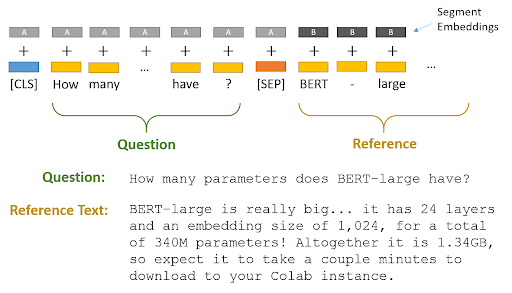

In [3]:
Image(filename='QA.png')

In [4]:
nlp = pipeline("question-answering")

All model checkpoint weights were used when initializing TFDistilBertForQuestionAnswering.

All the weights of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at distilbert-base-cased-distilled-squad.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.


In [5]:
result = nlp(question="How many jets are coming?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'five', score: 0.5552, start: 19, end: 23


In [6]:
result = nlp(question="how much distance they will cover?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: '7,000 km', score: 0.6845, start: 644, end: 652


In [7]:
result = nlp(question="when jets are arrving?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'July 29,', score: 0.1288, start: 100, end: 108


In [8]:
result = nlp(question="where they will take stopage?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'United Arab Emirates (UAE).', score: 0.2479, start: 746, end: 774


In [9]:
result = nlp(question="what is the cost?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Rs 59,000-crore', score: 0.9173, start: 440, end: 455


In [10]:
result = nlp(question="what is the name of jets?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'Rafale', score: 0.4029, start: 24, end: 30


### Generate summary of text corpus

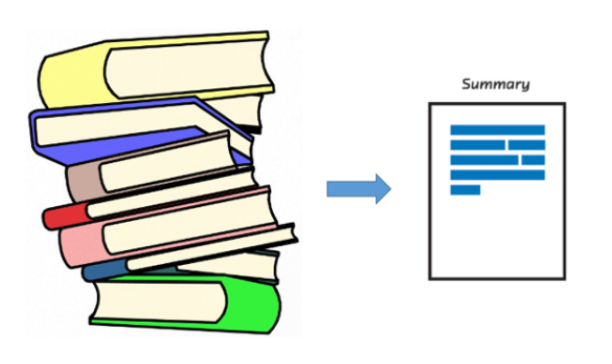

In [11]:
Image(filename='summary.png')

In [12]:
summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

All model checkpoint weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [13]:
summarizer(context, min_length=5, max_length=20)

[{'summary_text': 'the first batch of five Rafale jets flew out of France today .'}]

In [14]:
summarizer_text = summarizer(context, min_length=5, max_length=40)
summarizer_text_res = summarizer_text[0]['summary_text']
summarizer_text_res

'the first batch of five Rafale jets flew out of France today and will arrive in India on Wednesday . the fighter jets, built by french aviation firm Dassault'

In [15]:
len(context),len(summarizer_text_res)

(1025, 157)

In [16]:
len(summarizer_text_res.split())

29

In [17]:
summarizer_text = summarizer(context, min_length=5, max_length=30)
summarizer_text_res = summarizer_text[0]['summary_text']
summarizer_text_res

'the first batch of five Rafale jets flew out of France today and will arrive in India on Wednesday . the fighter jet'